In [1]:
import os

import gensim
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.manifold import TSNE

%matplotlib inline

Using Theano backend.


In [2]:
# Loading patient2vec model
PATIENT2VEC_MODEL_DIR = "../patient2vec/models_improved/"
PATIENT2VEC_MODEL = "patient2vec_pvdbow_hs_win-30_emb-100.gen"

patient2vec = gensim.models.Doc2Vec.load(os.path.join(PATIENT2VEC_MODEL_DIR, PATIENT2VEC_MODEL))

In [3]:
# Loading patients

all_patients = pd.read_csv('../breast_cancer/data/intermediate/patient_list_split.csv')
cancer_indexes = np.where(all_patients["OUTCOME"].values == 1)
control_indexes = np.where(all_patients["OUTCOME"].values == 0)

In [4]:
p2v_vectors = []

for i, ptid in enumerate(all_patients["IND_SEQ"]):
    p2v_vectors.append(patient2vec.docvecs[str(ptid)])

In [5]:
p2v_vectors = np.array(p2v_vectors)

CPU times: user 1min 54s, sys: 8.5 s, total: 2min 3s
Wall time: 2min 3s
5


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


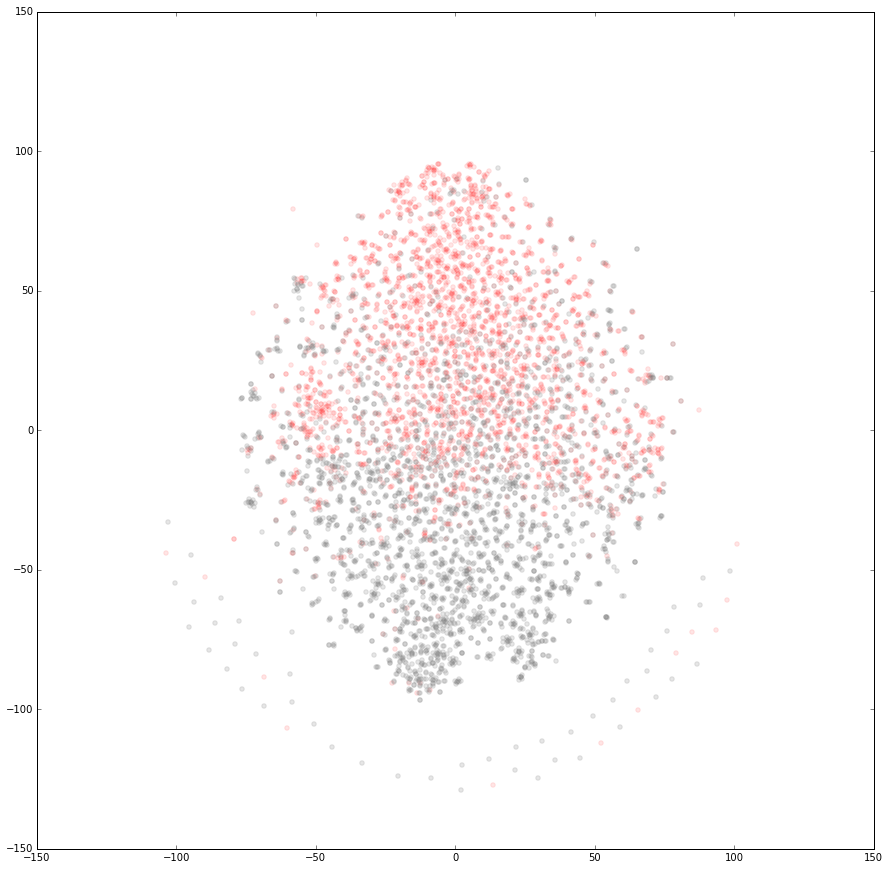

CPU times: user 1min 59s, sys: 9.22 s, total: 2min 8s
Wall time: 2min 9s
10


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


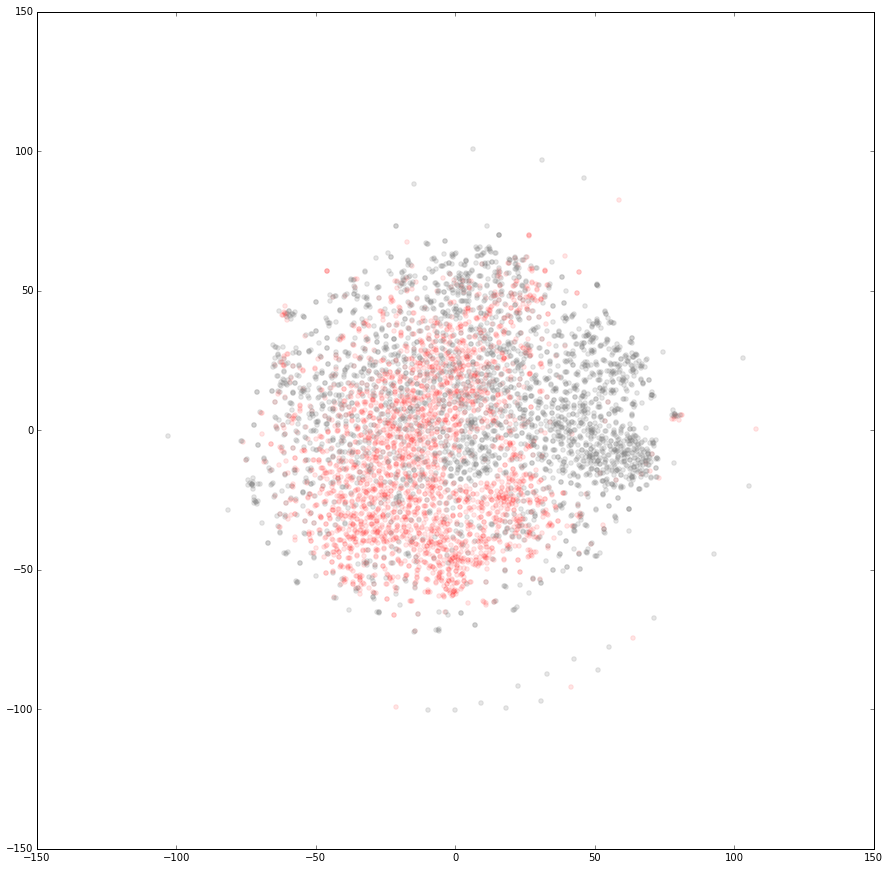

CPU times: user 2min 33s, sys: 10.4 s, total: 2min 44s
Wall time: 2min 45s
20


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


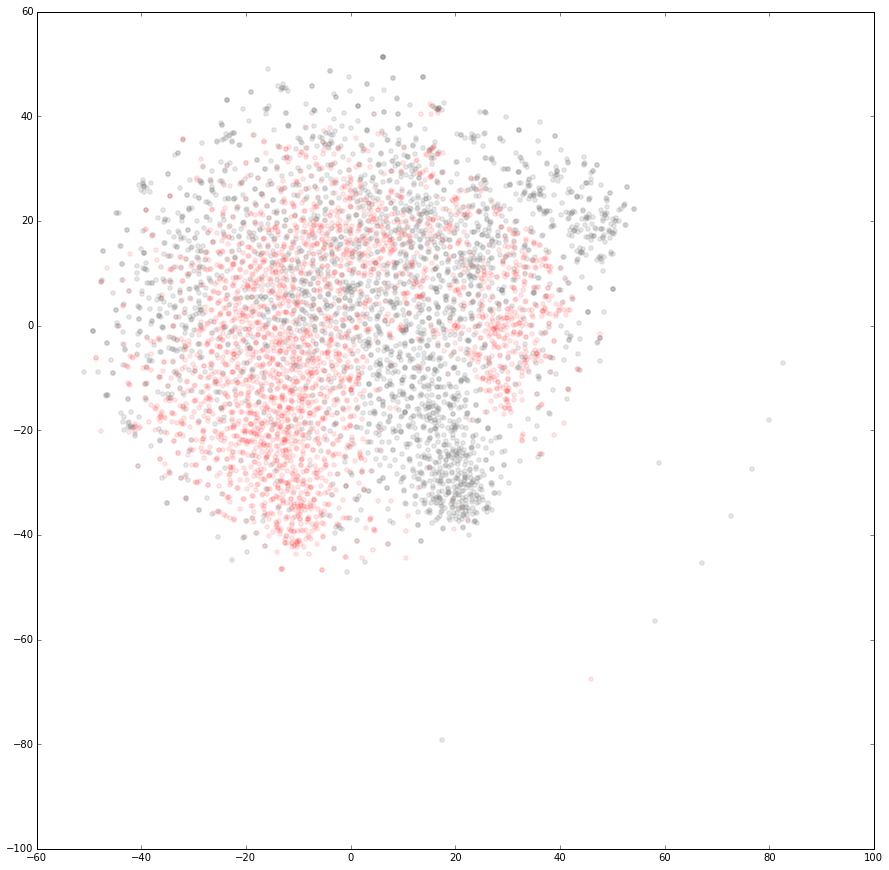

CPU times: user 2min 54s, sys: 11 s, total: 3min 5s
Wall time: 3min 7s
30


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


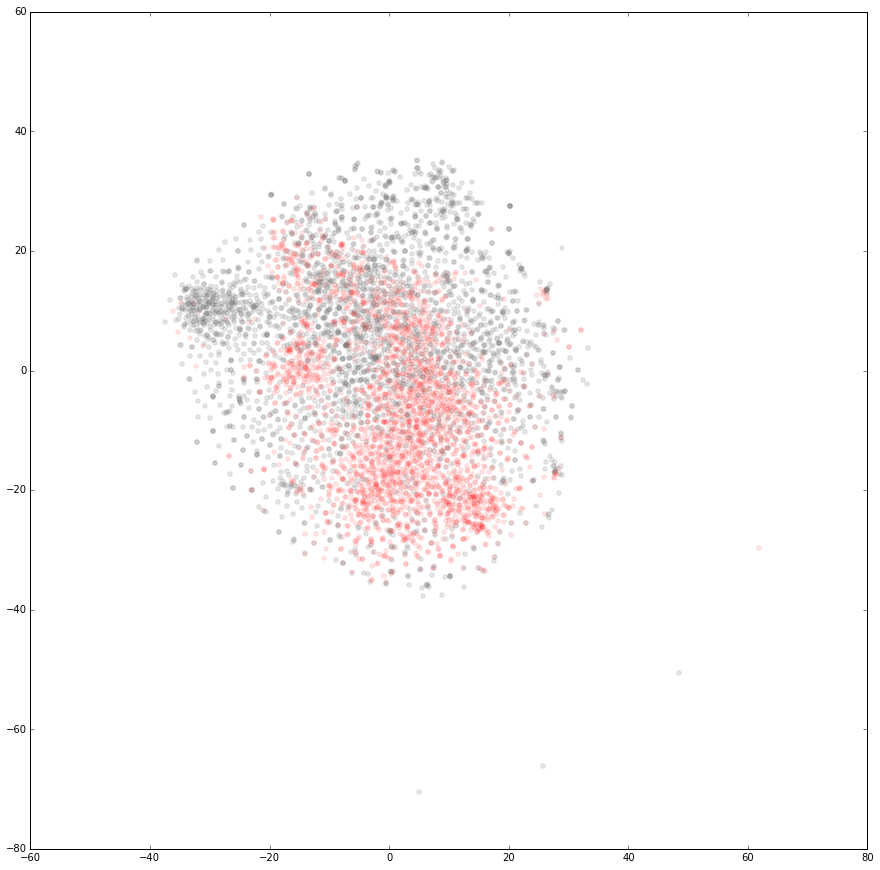

CPU times: user 3min 48s, sys: 12.6 s, total: 4min 1s
Wall time: 4min 7s
50


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


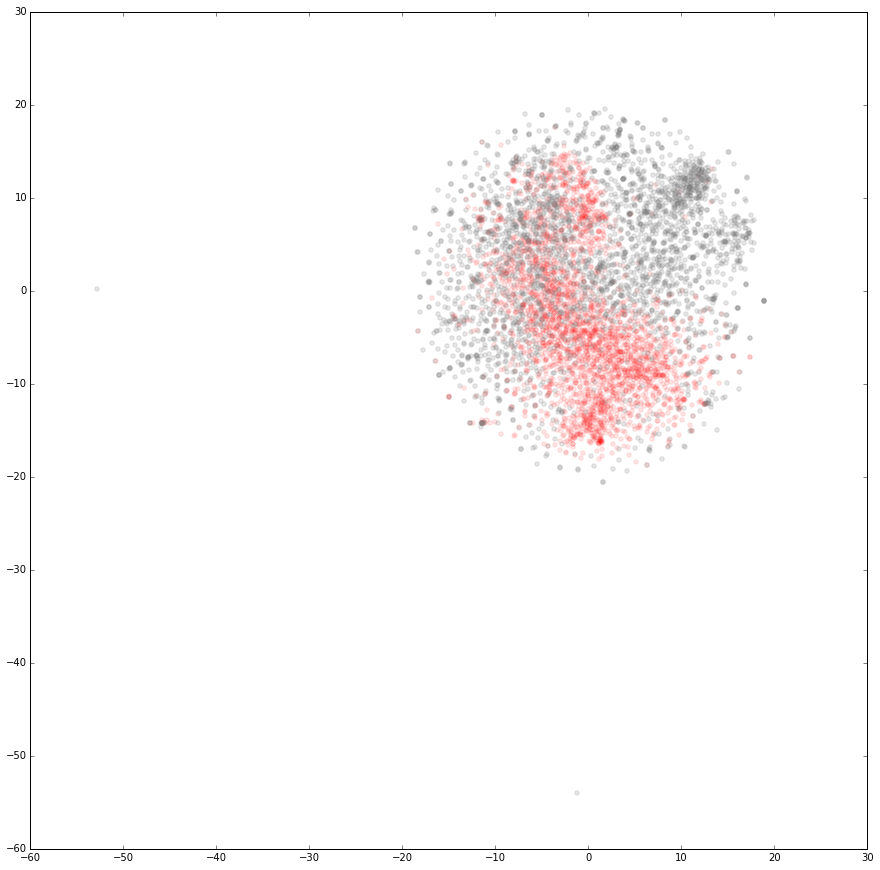

CPU times: user 5min 28s, sys: 14.7 s, total: 5min 43s
Wall time: 5min 52s
80


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


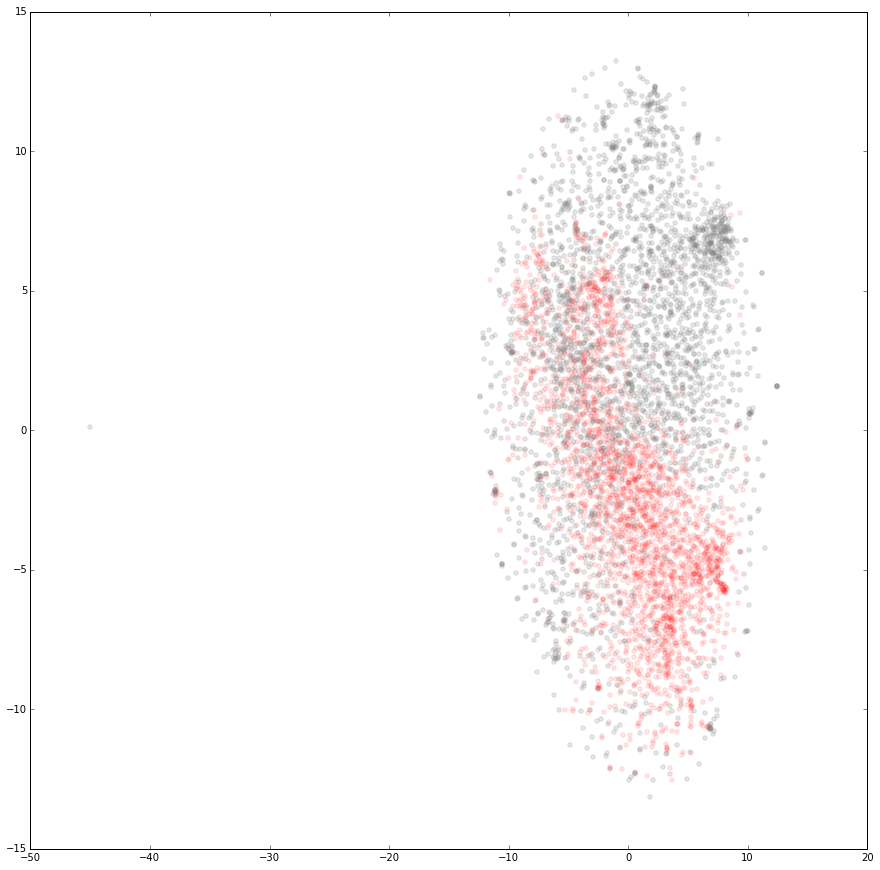

In [6]:
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)
perplexities = [5, 10, 20, 30, 50, 80]
Y = {}

for p in perplexities:
    tsne = TSNE(perplexity=p)
    %time Y[p] = tsne.fit_transform(p2v_vectors)
    print(p)
    plt.scatter(Y[p][cancer_indexes][:,0], Y[p][cancer_indexes][:,1], color='red', alpha=0.1)
    plt.scatter(Y[p][control_indexes][:,0], Y[p][control_indexes][:,1], color='grey', alpha=0.1)
    plt.scatter(Y[p][control_indexes][:,0], Y[p][control_indexes][:,1], color='grey', alpha=0.1)
    plt.show()


In [7]:
np.where(all_patients["OUTCOME"].values == 0)

(array([   4,    8,    9, ..., 5798, 5799, 5800]),)

In [8]:
import random

all_p2v_patients = list(patient2vec.docvecs.doctags.keys())

random.seed(5)

random_patients = random.sample(all_p2v_patients, 100000)

p2v_vectors = p2v_vectors.tolist()

for p in random_patients:
    v = patient2vec.docvecs[str(p)]
    p2v_vectors.append(v)


In [9]:
p2v_vectors_np = np.array(p2v_vectors)

In [10]:
p2v_vectors_np.shape

(105802, 100)

CPU times: user 1h 49min 12s, sys: 3min 32s, total: 1h 52min 45s
Wall time: 1h 57min 14s
5


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


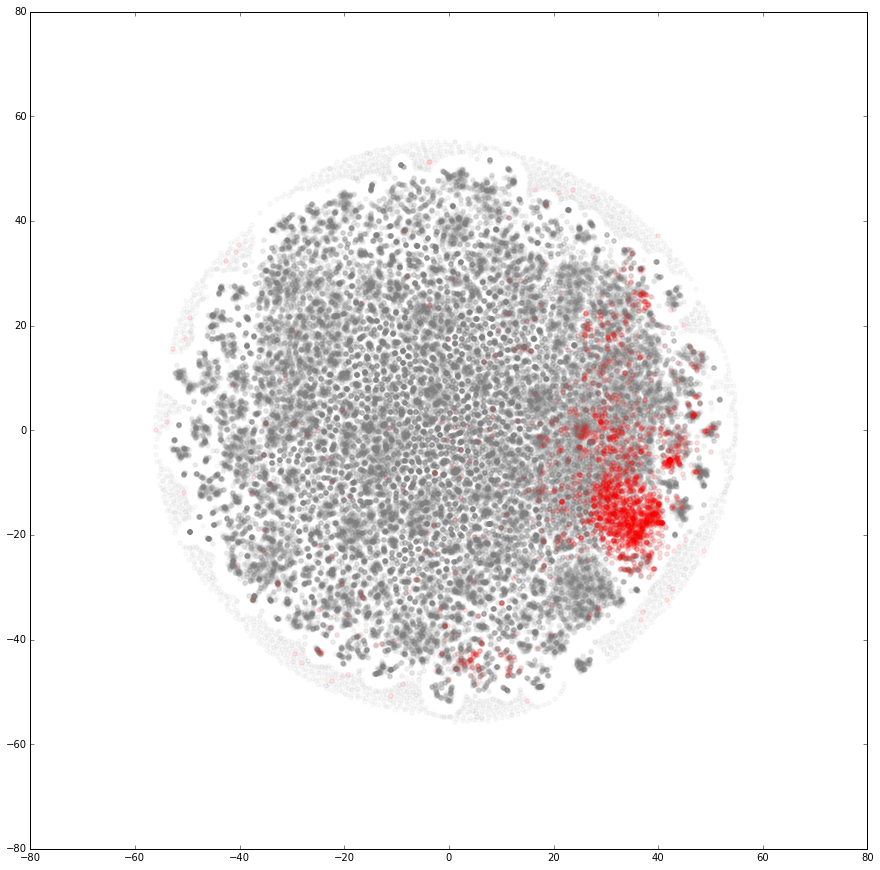

CPU times: user 2h 5min 6s, sys: 3min 55s, total: 2h 9min 1s
Wall time: 2h 16min 8s
15


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


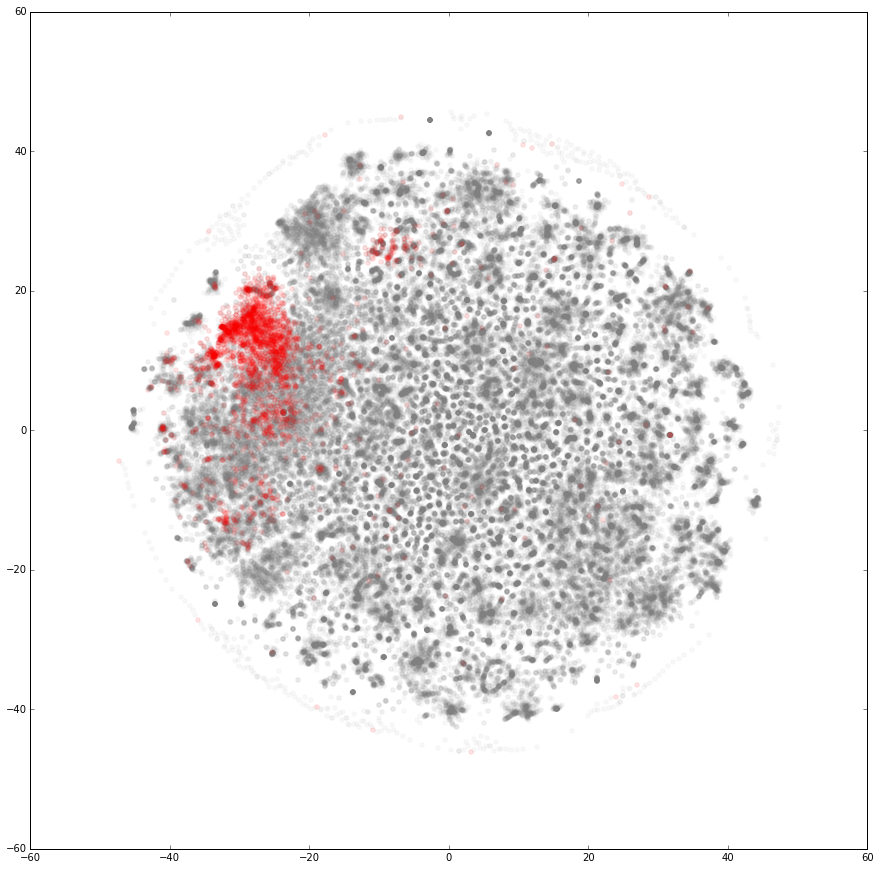

CPU times: user 2h 10min 2s, sys: 4min 14s, total: 2h 14min 17s
Wall time: 2h 15min 17s
30


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


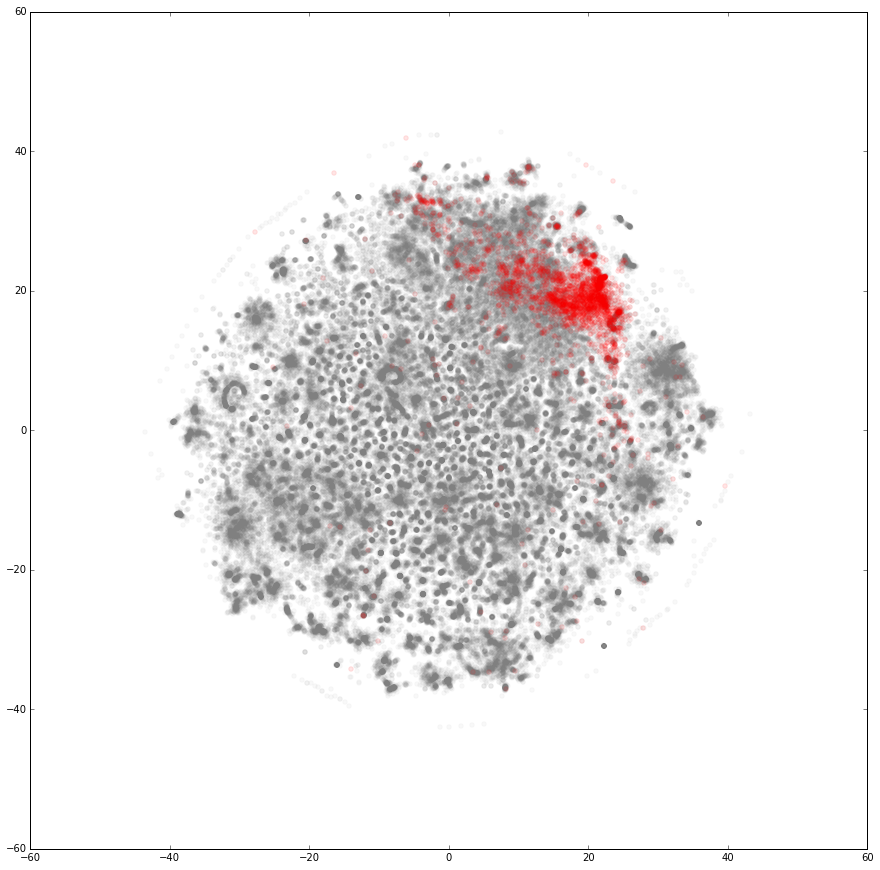

CPU times: user 2h 28min 40s, sys: 4min 59s, total: 2h 33min 39s
Wall time: 2h 34min 45s
50


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


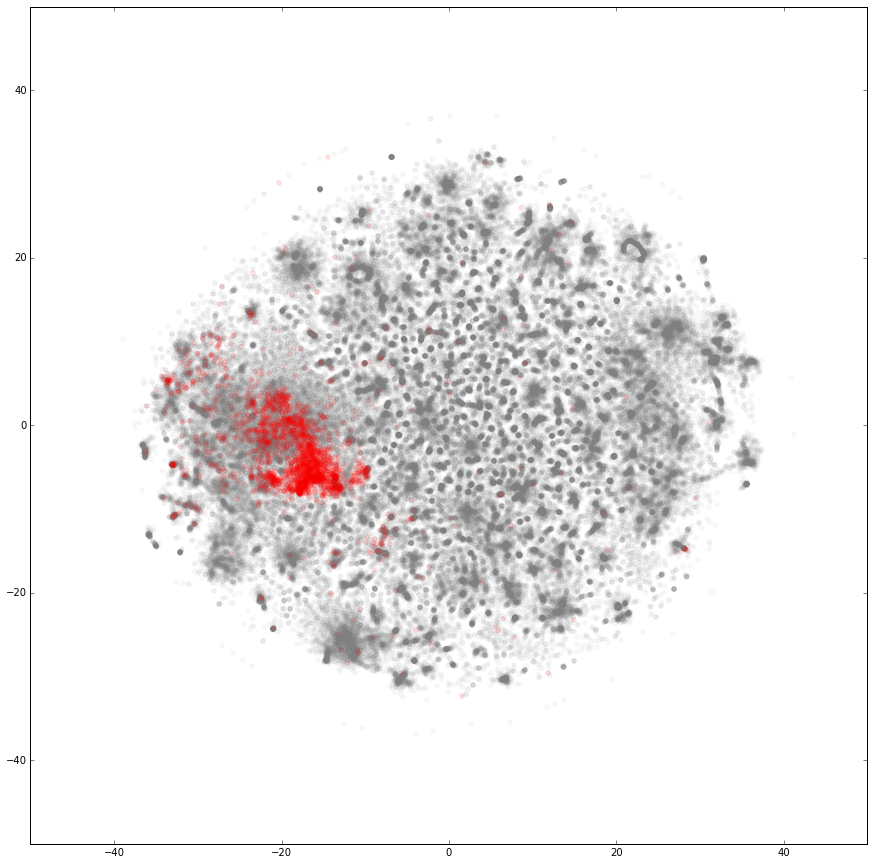

CPU times: user 2h 55min 14s, sys: 6min 48s, total: 3h 2min 2s
Wall time: 3h 3min 20s
80


/Users/jacek/.pyenv/versions/3.5.0/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


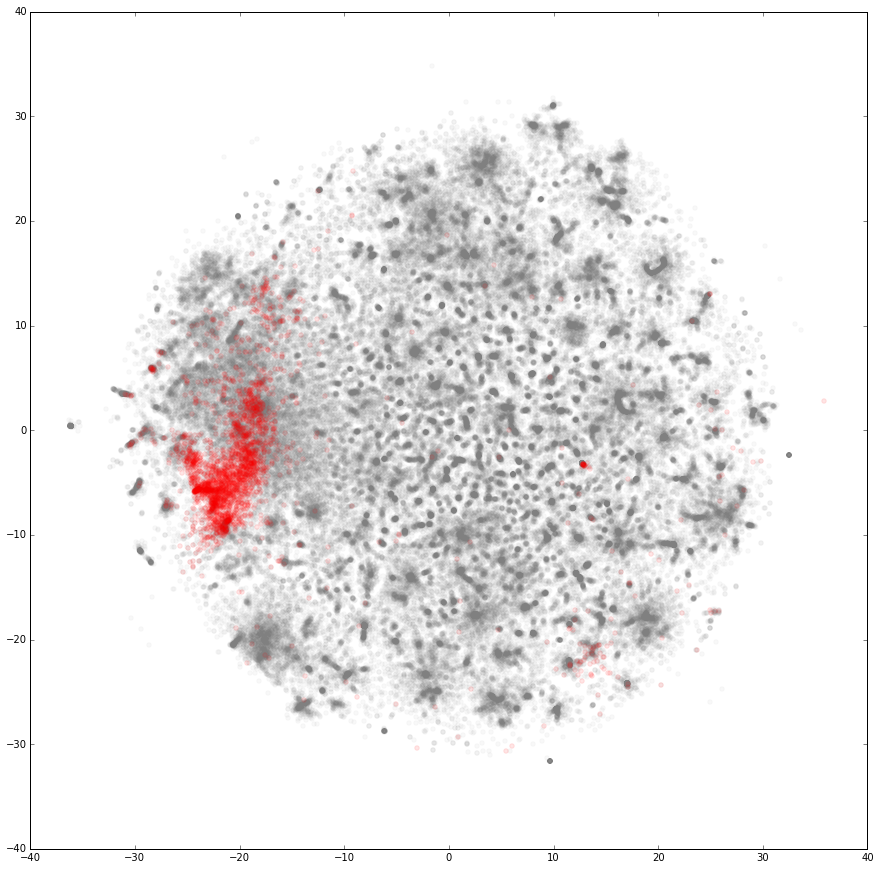

In [11]:
perplexities = [5, 15, 30, 50, 80]
Y_all = {}

for p in perplexities:
    tsne = TSNE(perplexity=p)
    %time Y_all[p] = tsne.fit_transform(p2v_vectors_np)
    
    print(p)
    other_indexes = list(range(0, len(Y_all[p])))
    for v in (cancer_indexes[0].tolist()+control_indexes[0].tolist()):
        other_indexes.remove(v)
    
    plt.scatter(Y_all[p][other_indexes][:,0], Y_all[p][other_indexes][:,1], color='grey', alpha=0.05)
    plt.scatter(Y_all[p][control_indexes][:,0], Y_all[p][control_indexes][:,1], color='grey', alpha=0.1)
    plt.scatter(Y_all[p][cancer_indexes][:,0], Y_all[p][cancer_indexes][:,1], color='red', alpha=0.1)
    plt.show()
    